<img src="./image/25.png">

In [26]:
import numpy as np


def unit_vector(i, length):
    unit_vector = np.zeros((length))
    unit_vector[i] = 1
    return unit_vector
def second_derivative_2psr(cost_function, theta, i, j):
    alpha1 = np.pi/4
    beta1 = alpha1
    alpha = alpha1
    scalar_factor = 1/4*(np.sin(alpha)**2)
    length = theta.shape[0]
    k1 = cost_function(theta + alpha*(unit_vector(i, length) + unit_vector(j, length)))
    k2 = -cost_function(theta + alpha*(unit_vector(i, length) - unit_vector(j, length)))
    k3 = -cost_function(theta - alpha*(unit_vector(i, length) - unit_vector(j, length)))
    k4 = cost_function(theta - alpha*(unit_vector(i, length) + unit_vector(j, length)))
    return scalar_factor*(k1 + k2 + k3 + k4)

<img src="./image/26.png">

In [28]:
import numpy as np


def second_derivative_4psr(cost_function, theta, i, j):
    alpha1 = np.pi/2
    alpha2 = np.pi
    d1 = 1j
    d2 = 1j*(-1 + np.sqrt(2)) / 2
    scalar_factor = (-1j/2)**2
    length = theta.shape[0]
    k1A = -1*(cost_function(theta + alpha1*unit_vector(i, length) + alpha1*unit_vector(j, length))
    - cost_function(theta + alpha1*unit_vector(i, length) - alpha1*unit_vector(j, length)))
    k1B = -1j*d2*(cost_function(theta + alpha1*unit_vector(i, length) + alpha2*unit_vector(j, length))
    - cost_function(theta + alpha1*unit_vector(i, length) - alpha2*unit_vector(j, length)))

    k2A = 1*(cost_function(theta - alpha1*unit_vector(i, length) + alpha1*unit_vector(j, length))
    - cost_function(theta - alpha1*unit_vector(i, length) - alpha1*unit_vector(j, length)))
    k2B = 1j*d2*(cost_function(theta - alpha1*unit_vector(i, length) + alpha2*unit_vector(j, length))
    - cost_function(theta - alpha1*unit_vector(i, length) - alpha2*unit_vector(j, length)))

    
    
    
    k3A = -1j*d2*(cost_function(theta + alpha2*unit_vector(i, length) + alpha1*unit_vector(j, length))
    - cost_function(theta + alpha2*unit_vector(i, length) - alpha1*unit_vector(j, length)))
    k3B = (d2**2)*(cost_function(theta + alpha2*unit_vector(i, length) + alpha2*unit_vector(j, length))
    + cost_function(theta + alpha2*unit_vector(i, length) - alpha2*unit_vector(j, length)))

    k4A = 1j*d2*(cost_function(theta - alpha2*unit_vector(i, length) + alpha1*unit_vector(j, length))
    - cost_function(theta - alpha2*unit_vector(i, length) - alpha1*unit_vector(j, length)))
    k4B = -(d2**2)*(cost_function(theta - alpha2*unit_vector(i, length) + alpha2*unit_vector(j, length))
    + cost_function(theta - alpha2*unit_vector(i, length) - alpha2*unit_vector(j, length)))

    return scalar_factor*(k1A + k1B + k2A + k2B + k3A + k3B + k4A + k4B)

<img src="./image/27.png">

<img src="./image/28.png">

In [37]:
import qiskit, numpy as np
import base
theta = np.random.uniform(low=0, high=2*np.pi, size=(3,))
theta_x, theta_z, theta_y = theta
def cost_function(theta):
    qc = qiskit.QuantumCircuit(2,2)
    qc.rx(theta[0], 0)
    qc.rz(theta[1], 1)
    qc.cry(theta[2], 0, 1)
    return base.measure(qc, [0, 1])


g = np.zeros((3,3), dtype=np.complex128)
g[0, 0] = -1/2*second_derivative_2psr(cost_function, theta, 0, 0)
g[2, 2] = -1/2*second_derivative_4psr(cost_function, theta, 2, 2)
print(1/4*(np.sin(theta_x/2)**2))
print(g)

0.16594208965964133
[[-0.02103125+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -0.00061174+0.j]]


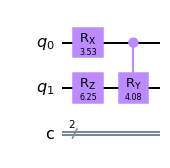

In [36]:
qc = qiskit.QuantumCircuit(2,2)
qc.rx(theta[0], 0)
qc.rz(theta[1], 1)
qc.cry(theta[2], 0, 1)
qc.draw('mpl')